<a href="https://colab.research.google.com/github/FrancescoZanni/MLPNS_FZanni/blob/main/CentralLimitTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pylab as pl
import scipy as sp
from scipy import stats
from scipy.optimize import curve_fit
import seaborn #altro pacchetto che mi fa plottare, più avanzato 
seaborn.set_style("darkgrid")


Per ora faccio l'esercizio con una distribuzione, poi lo completeremo con le altre

In [2]:
np.random.seed(69420)
mymean = 100  #setto la media che sarà la stessa per tutte le distribuzioni

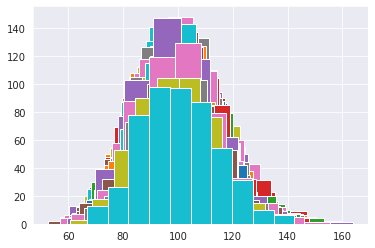

In [33]:
#chi2 distribution 
k=mymean   #setto il parametro in modo che la media sia quella, in questo caso è molto easy
p=0.5      #setto i parametri per la binomiale 
n=mymean/p #il secondo lo definisco in modo che la media sarà mymean

#userò un dizionario ma lo posso fare anche con gli array o le liste allo stesso modo 
#ha valori che sono associati a una keyword, do un nome ai valori che sono contenuti 
#comodo perchè posso usare la dimensione del sample come nome del sample
#così lo ritrovo senza ricordarmi un indice o cose simili

mychisquare = {}
mypoisson  = {}
mycauchy = {}
mybinomial = {}
myuniform = {}

for i in range(100):
   pl.hist(np.random.chisquare(k,size = 500)) #non uso sp.stats solo per cambiare rispetto a prima vantaggio di usare numpy è che mi fa scegliere la shape che voglio anche matrici ecc
   

In [50]:
mysize = (np.random.rand(1000)*2000).astype(int)  #li converto in interi perchè voglio che siano dimensioni di array
mysize[mysize<10] = 10 #faccio in modo che non ce ne siano minori di 10

np.size(mysize)

1000

Text(0.5, 1.0, 'Cauchy')

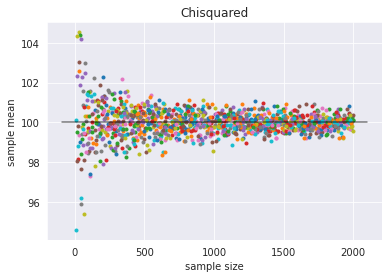

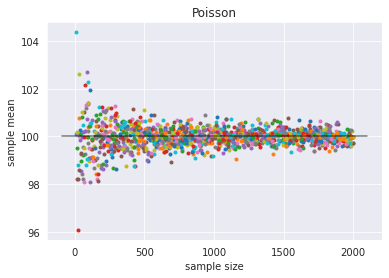

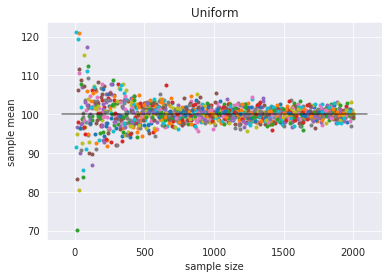

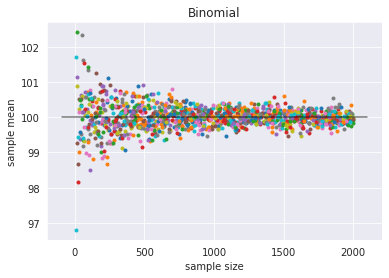

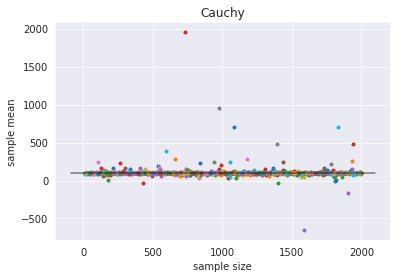

In [56]:
for s in mysize:
  mychisquare[s]=np.random.chisquare(k,size = s) #gli do il nome che è la dimensione e lo popolo
  myuniform[s]=np.random.rand(s)*2*k
  mypoisson[s]=np.random.poisson(lam=k,size=s)
  mybinomial[s]=np.random.binomial(n,p,size=s)
  mycauchy[s]=sp.stats.cauchy.rvs(loc=k,scale=3,size=s)
# in più gli posso dare elementi di tipi diversi, cosme in una lista ma non come in un array 

ax=pl.figure().add_subplot(111)
bx=pl.figure().add_subplot(111)
cx=pl.figure().add_subplot(111)
dx=pl.figure().add_subplot(111)
ex=pl.figure().add_subplot(111)


mchisquare = {}
mpoisson = {}
mcauchy = {}
mbinomial = {}
muniform = {}

for d in mychisquare.keys():   #estraggo tutti i nomi degli elementi del dizionario 
  
  ax.plot(d,mychisquare[d].mean(), '.')
  mchisquare[d] = mychisquare[d].mean()
  bx.plot(d,mypoisson[d].mean(),'.')
  mpoisson[d]=mypoisson[d].mean()
  cx.plot(d,myuniform[d].mean(),'.')
  muniform[d]=myuniform[d].mean()
  dx.plot(d,mybinomial[d].mean(),'.')
  mbinomial[d]=mybinomial[d].mean()
  ex.plot(d,mycauchy[d].mean(),'.')
  mcauchy[d]=mycauchy[d].mean()

ax.plot(pl.xlim(),[100,100],'k', alpha=0.5)
ax.set_xlabel("sample size")
ax.set_ylabel("sample mean")
ax.set_title("Chisquared")
bx.plot(pl.xlim(),[100,100],'k', alpha=0.5)
bx.set_xlabel("sample size")
bx.set_ylabel("sample mean")
bx.set_title("Poisson")
cx.plot(pl.xlim(),[100,100],'k', alpha=0.5)
cx.set_xlabel("sample size")
cx.set_ylabel("sample mean")
cx.set_title("Uniform")
dx.plot(pl.xlim(),[100,100],'k', alpha=0.5)
dx.set_xlabel("sample size")
dx.set_ylabel("sample mean")
dx.set_title("Binomial")
ex.plot(pl.xlim(),[100,100],'k', alpha=0.5)
ex.set_xlabel("sample size")
ex.set_ylabel("sample mean")
ex.set_title("Cauchy")



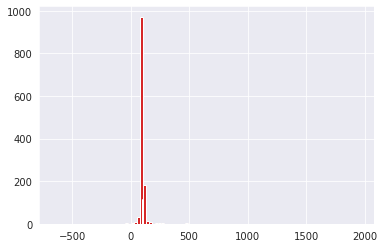

In [72]:
fitchisquare = pl.hist(mchisquare.values(),bins=100);
fitpoisson = pl.hist(mpoisson.values(),bins=100);
fituniform = pl.hist(muniform.values(),bins=100);
fitcauchy = pl.hist(mcauchy.values(),bins=100);
fitbinomial = pl.hist(mbinomial.values(),bins=100);


In [109]:
def Gauss(x,offset,A,x0,sigma):
  return offset+A*np.exp(-(x-x0)**2/(2*sigma**2))

xchisquare = np.asarray(fitchisquare[1][0:100])
xpoisson = np.asarray(fitpoisson[1][0:100])
xuniform = np.asarray(fituniform[1][0:100])
xbinomial = np.asarray(fitbinomial[1][0:100])
xcauchy = np.asarray(fitcauchy[1][0:100])

ychisquare = np.asarray(fitchisquare[0])
ypoisson = np.asarray(fitpoisson[0])
yuniform = np.asarray(fituniform[0])
ybinomial = np.asarray(fitbinomial[0])
ycauchy = np.asarray(fitcauchy[0])

pchi, cov = curve_fit(Gauss, xchisquare,ychisquare)
pbin, cov = curve_fit(Gauss, xbinomial,ybinomial)
pcau, cov = curve_fit(Gauss, xcauchy,ycauchy)
puni, cov = curve_fit(Gauss, xuniform,yuniform)
ppoi, cov = curve_fit(Gauss, xpoisson,ypoisson)

fittedchi = Gauss(xchisquare,pchi[0],pchi[1],pchi[2],pchi[3])
fittedbin = Gauss(xbinomial,pbin[0],pbin[1],pchi[2],pchi[3])
fittedcau = Gauss(xcauchy,pcau[0],pcau[1],pchi[2],pchi[3])
fittedpoi = Gauss(xpoisson,ppoi[0],ppoi[1],pchi[2],pchi[3])
fitteduni = Gauss(xuniform,puni[0],puni[1],pchi[2],pchi[3])

#pl.plot(fitpoisson[1][0:100],fitpoisson[0],'o', label='data')
#pl.plot(fitpoisson[1][0:100],fittedpoi,'-', label='fit')
pchi

/usr/local/lib/python3.9/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([12.44,  1.  ,  1.  ,  1.  ])